In [1]:
import pandas as pd


## Passes

In [2]:
df_passe = pd.read_excel("passes_br.xlsx")

In [3]:
df_passe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Class.               500 non-null    int64  
 1   Jogador              500 non-null    object 
 2   Nação                500 non-null    object 
 3   Pos.                 500 non-null    object 
 4   Equipe               500 non-null    object 
 5   Idade                500 non-null    object 
 6   Nascimento           500 non-null    int64  
 7   90s                  500 non-null    float64
 8   Cmp                  499 non-null    float64
 9   Att                  499 non-null    float64
 10  Cmp%                 497 non-null    float64
 11  DistTot              499 non-null    float64
 12  DistPrg              499 non-null    float64
 13  Cmp.1                499 non-null    float64
 14  Att.1                499 non-null    float64
 15  Cmp%.1               492 non-null    flo

In [4]:
df_passe = df_passe.drop(['Class.', 'Nação', 'Nascimento','Cmp.1','Att.1','Cmp%.1','Cmp.2','Att.2','Cmp%.2','Partidas'], axis=1)

In [5]:
df_passe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Jogador              500 non-null    object 
 1   Pos.                 500 non-null    object 
 2   Equipe               500 non-null    object 
 3   Idade                500 non-null    object 
 4   90s                  500 non-null    float64
 5   Cmp                  499 non-null    float64
 6   Att                  499 non-null    float64
 7   Cmp%                 497 non-null    float64
 8   DistTot              499 non-null    float64
 9   DistPrg              499 non-null    float64
 10  Cmp.3                499 non-null    float64
 11  Att.3                499 non-null    float64
 12  Cmp%.3               464 non-null    float64
 13  Assis.               500 non-null    int64  
 14  xAG                  499 non-null    float64
 15  xA                   499 non-null    flo

In [6]:
df_passe['PrgP/90s'] = df_passe['PrgP']/df_passe['90s']
df_passe = df_passe[df_passe['90s'] >= 2.5]
# Pegar top 10 jogadores com melhor valor na estatística
df_prgp_90s = df_passe.nlargest(10, 'PrgP/90s')
df_prgp_90s

,Jogador,Pos.,Equipe,Idade,90s,Cmp,Att,Cmp%,DistTot,DistPrg,...,Assis.,xAG,xA,A-xAG,KP,2025-03-01 00:00:00,PPA,CrsPA,PrgP,PrgP/90s
317,Gabriel Menino,LT,Atlético Mineiro,24-242,2.8,152.0,191.0,79.6,2625.0,811.0,...,1,0.6,0.9,0.4,4.0,18.0,4.0,0.0,27.0,9.642857
450,Alex Sandro,ZG,Flamengo,34-123,7.4,499.0,561.0,88.9,8295.0,2730.0,...,0,0.6,0.7,-0.6,5.0,61.0,6.0,1.0,66.0,8.918919
103,Igor Coronado,LT,Corinthians,32-284,3.8,197.0,255.0,77.3,3590.0,828.0,...,0,0.2,0.7,-0.2,4.0,21.0,8.0,2.0,33.0,8.684211
431,Óscar Romero,LT,Internacional,32-329,2.9,152.0,185.0,82.2,2731.0,847.0,...,1,0.8,0.6,0.2,10.0,20.0,5.0,2.0,25.0,8.620690
104,Philippe Coutinho,LT,Vasco da Gama,32-351,4.8,205.0,250.0,82.0,3521.0,1054.0,...,1,0.8,1.0,0.2,12.0,31.0,6.0,0.0,39.0,8.125000
61,Damián Bobadilla,LT,São Paulo,23-322,2.9,145.0,155.0,93.5,2748.0,764.0,...,0,0.2,0.6,-0.2,2.0,23.0,5.0,0.0,23.0,7.931034
411,Everton Ribeiro,LT,Bahia,36-049,5.3,280.0,328.0,85.4,4813.0,1461.0,...,0,1.5,1.4,-1.5,13.0,36.0,11.0,4.0,42.0,7.924528
349,Leo Ortiz,ZG,Flamengo,29-146,9.0,608.0,672.0,90.5,12357.0,4560.0,...,0,0.0,0.2,0.0,2.0,70.0,3.0,1.0,70.0,7.777778
189,Igor Gomes,"LT,AT",Atlético Mineiro,26-073,3.1,90.0,120.0,75.0,1734.0,660.0,...,1,0.3,0.3,0.7,7.0,17.0,6.0,0.0,24.0,7.741935
448,José Sabino,ZG,São Paulo,28-216,3.5,169.0,194.0,87.1,3327.0,1335.0,...,0,0.0,0.1,0.0,1.0,26.0,0.0,0.0,27.0,7.714286


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


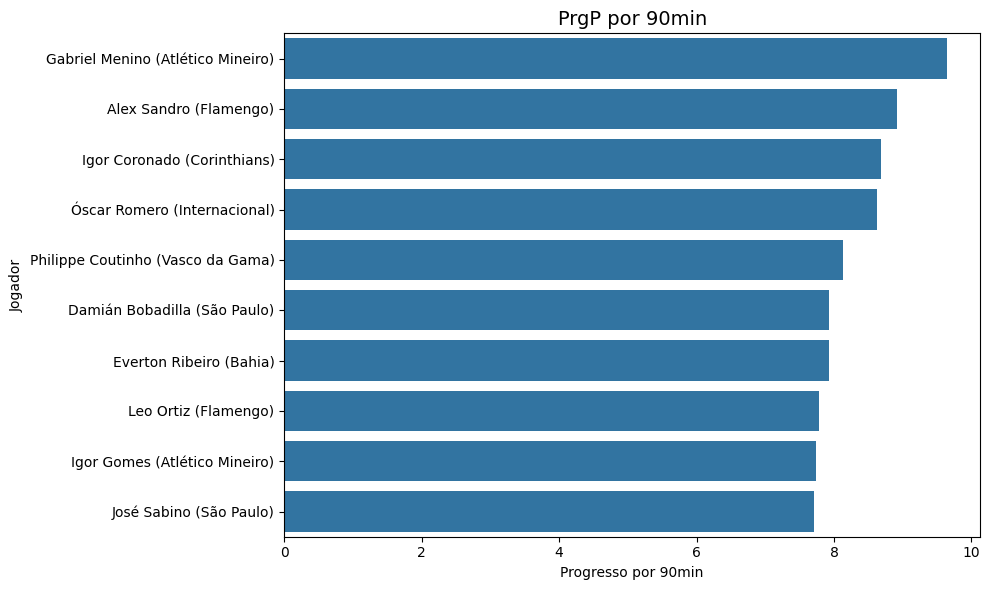

In [8]:
df_prgp_90s['Jogador'] = df_prgp_90s['Jogador'] + ' (' + df_prgp_90s['Equipe'] + ')'

plt.figure(figsize=(10,6))

# Gráfico de barras horizontal
sns.barplot(
    x='PrgP/90s', 
    y='Jogador', 
    data=df_prgp_90s, 
)

plt.title('PrgP por 90min', fontsize=14)
plt.xlabel('Progresso por 90min')
plt.ylabel('Jogador')

plt.tight_layout()
plt.show()


C:\Users\Pichau\AppData\Local\Temp\ipykernel_7272\795283711.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


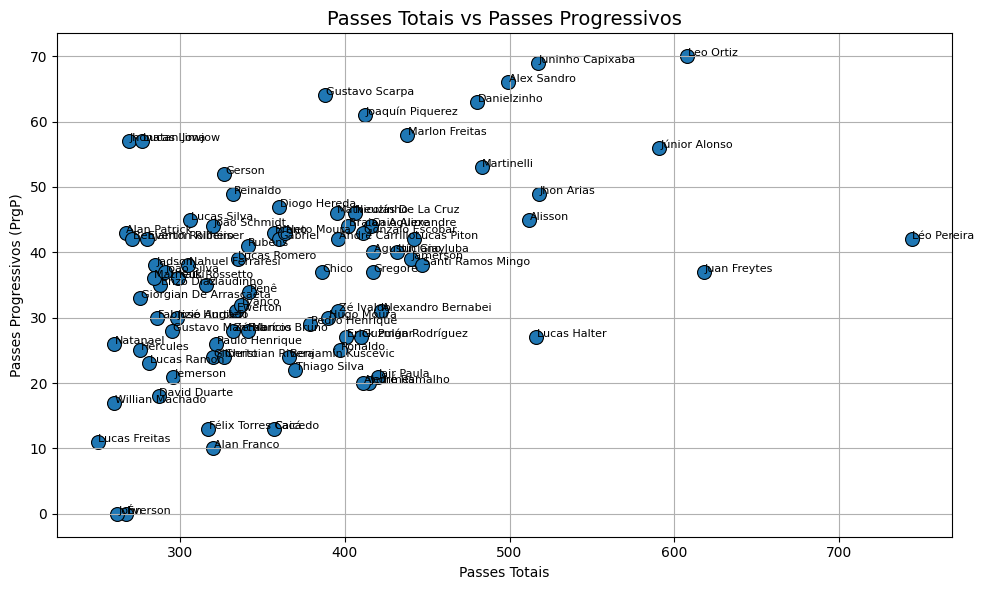

In [9]:
df_passe = df_passe[df_passe['90s']>= 2.5]
df_passe = df_passe[df_passe['Cmp']>= 250]

plt.figure(figsize=(10,6))

# Gráfico de dispersão
sns.scatterplot(
    x='Cmp', 
    y='PrgP',  
    data=df_passe, 
    palette='husl',  
    s=100,  
    edgecolor='black'  
)

for i in range(len(df_passe)):
    plt.text(df_passe['Cmp'].iloc[i]+0.5, df_passe['PrgP'].iloc[i], df_passe['Jogador'].iloc[i], fontsize=8)

plt.title('Passes Totais vs Passes Progressivos', fontsize=14)
plt.xlabel('Passes Totais')
plt.ylabel('Passes Progressivos (PrgP)')

plt.grid(True)
plt.tight_layout()
plt.show()


In [10]:
df_passe['P/90s'] = df_passe['Cmp']/df_passe['90s']
df_passe.head()

,Jogador,Pos.,Equipe,Idade,90s,Cmp,Att,Cmp%,DistTot,DistPrg,...,xAG,xA,A-xAG,KP,2025-03-01 00:00:00,PPA,CrsPA,PrgP,PrgP/90s,P/90s
3,Braian Aguirre,ZG,Internacional,24-305,8.9,402.0,511.0,78.7,7402.0,2709.0,...,0.4,0.4,-0.4,4.0,40.0,7.0,4.0,44.0,4.943820,45.168539
7,Caio Alexandre,LT,Bahia,26-094,6.5,416.0,460.0,90.4,6860.0,1752.0,...,0.1,0.4,0.9,4.0,43.0,5.0,0.0,44.0,6.769231,64.000000
9,Alisson,LT,São Paulo,31-338,9.3,512.0,570.0,89.8,9800.0,2473.0,...,0.2,0.3,-0.2,5.0,44.0,5.0,2.0,45.0,4.838710,55.053763
14,Júnior Alonso,ZG,Atlético Mineiro,32-109,9.2,591.0,686.0,86.2,11683.0,4395.0,...,0.1,0.2,0.9,3.0,63.0,2.0,1.0,56.0,6.086957,64.239130
21,Fabrizio Angileri,ZG,Corinthians,31-075,5.3,286.0,349.0,81.9,4852.0,1855.0,...,0.1,0.1,-0.1,2.0,24.0,1.0,1.0,30.0,5.660377,53.962264


C:\Users\Pichau\AppData\Local\Temp\ipykernel_7272\2662368880.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


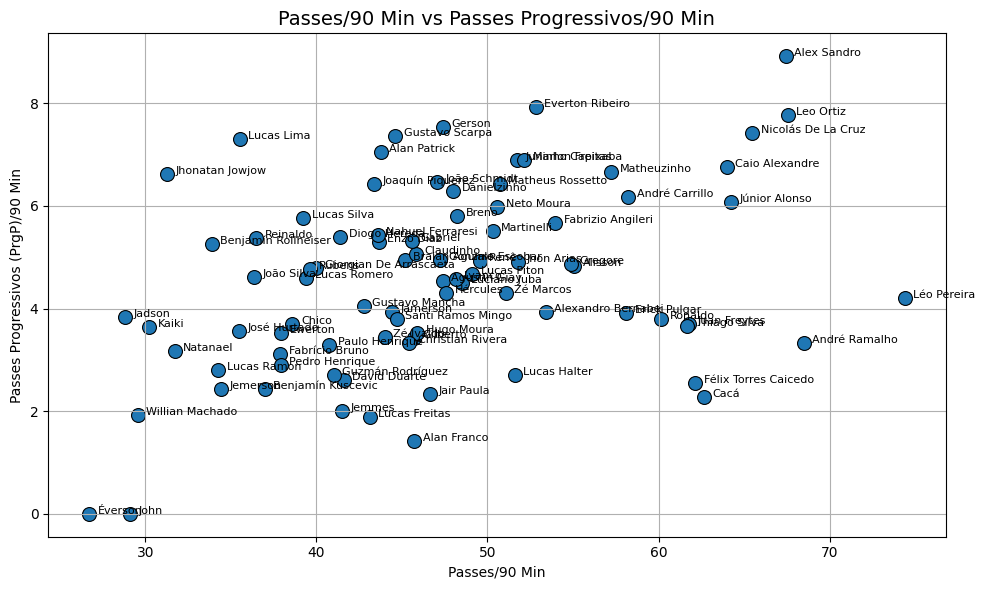

In [11]:
plt.figure(figsize=(10,6))

# Gráfico de dispersão
sns.scatterplot(
    x='P/90s',
    y='PrgP/90s',
    data=df_passe,
    palette='husl',
    s=100,
    edgecolor='black'
)

for i in range(len(df_passe)):
    plt.text(df_passe['P/90s'].iloc[i]+0.5, df_passe['PrgP/90s'].iloc[i], df_passe['Jogador'].iloc[i], fontsize=8)

plt.title('Passes/90 Min vs Passes Progressivos/90 Min', fontsize=14)
plt.xlabel('Passes/90 Min')
plt.ylabel('Passes Progressivos (PrgP)/90 Min')

plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
df_kp = df_passe[['Jogador','Equipe','90s', 'KP','xA','xAG']].copy()
df_kp['KP/90s'] = df_kp['KP']/df_kp['90s']
df_kp = df_kp[df_kp['90s'] >= 2.5]
df_kp = df_kp.sort_values(by='KP/90s',ascending=False)
df_kp = df_kp.head(10)

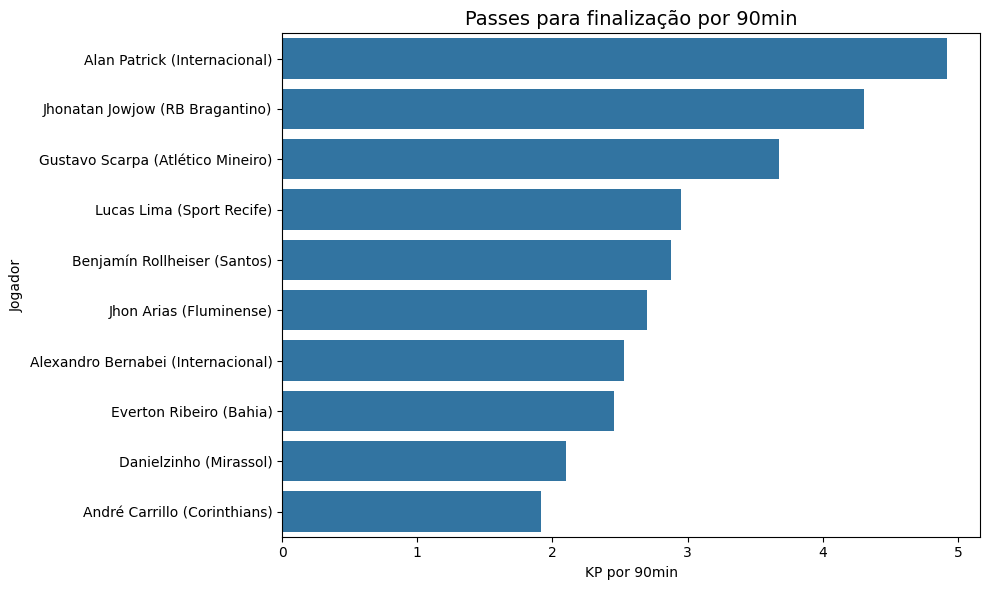

In [13]:
df_kp['Jogador'] = df_kp['Jogador'] + ' (' + df_kp['Equipe'] + ')'

plt.figure(figsize=(10,6))

sns.barplot(
    x='KP/90s', 
    y='Jogador', 
    data=df_kp, 
)

plt.title('Passes para finalização por 90min', fontsize=14)
plt.xlabel('KP por 90min')
plt.ylabel('Jogador')

plt.tight_layout()
plt.show()

## Chutes

In [14]:
df_chutes = pd.read_excel('chutes_br.xlsx')
df_chutes.head(10)

,Class.,Jogador,Nação,Pos.,Equipe,Idade,Nascimento,90s,Gols,TC,...,Dist,FK,PB,PT,xG,npxG,npxG/Sh,G-xG,np:G-xG,Partidas
0,1,Abner,br BRA,ZG,Juventude,21-040,2004,5.5,0,1,...,8.7,0,0,0,0.1,0.1,0.09,-0.1,-0.1,Partidas
1,2,Nicolás Acevedo,uy URU,"LT,ZG",Bahia,26-045,1999,3.1,0,1,...,22.1,0,0,0,0.0,0.0,0.03,0.0,0.0,Partidas
2,3,Adson,br BRA,"AT,LT",Vasco da Gama,24-235,2000,2.2,0,3,...,19.2,0,0,0,0.1,0.1,0.05,-0.1,-0.1,Partidas
3,4,Braian Aguirre,ar ARG,ZG,Internacional,24-305,2000,8.9,1,8,...,30.4,0,0,0,0.3,0.3,0.04,+0.7,+0.7,Partidas
4,5,Carlos Alberto,br BRA,"AT,LT",Sport Recife,23-045,2002,3.4,0,3,...,17.9,0,0,0,0.5,0.5,0.17,-0.5,-0.5,Partidas
5,6,Yuri Alberto,br BRA,AT,Corinthians,24-072,2001,8.1,5,23,...,16.2,0,1,1,4.0,3.2,0.14,+1.0,+0.8,Partidas
6,7,José Aldo,br BRA,LT,Mirassol,26-308,1998,4.5,0,5,...,18,0,0,0,0.3,0.3,0.05,-0.3,-0.3,Partidas
7,8,Caio Alexandre,br BRA,LT,Bahia,26-094,1999,6.5,0,3,...,25.6,0,0,0,0.1,0.1,0.04,-0.1,-0.1,Partidas
8,9,Matheus Alexandre,br BRA,ZG,Sport Recife,26-052,1999,2.0,0,0,...,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0,Partidas
9,10,Alisson,br BRA,LT,São Paulo,31-338,1993,9.3,0,9,...,26.2,2,0,0,0.4,0.4,0.04,-0.4,-0.4,Partidas


In [15]:
df_chutes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Class.      553 non-null    object
 1   Jogador     553 non-null    object
 2   Nação       553 non-null    object
 3   Pos.        553 non-null    object
 4   Equipe      553 non-null    object
 5   Idade       553 non-null    object
 6   Nascimento  553 non-null    object
 7   90s         553 non-null    object
 8   Gols        553 non-null    object
 9   TC          553 non-null    object
 10  CaG         553 non-null    object
 11  SoT%        437 non-null    object
 12  Sh/90       553 non-null    object
 13  SoT/90      553 non-null    object
 14  G/Sh        437 non-null    object
 15  G/SoT       317 non-null    object
 16  Dist        436 non-null    object
 17  FK          552 non-null    object
 18  PB          553 non-null    object
 19  PT          553 non-null    object
 20  xG        

In [16]:
df_chutes["90s"] = pd.to_numeric(df_chutes['90s'], errors='coerce')
df_chutes["G-xG"] = pd.to_numeric(df_chutes['G-xG'], errors='coerce')
df_chutes["TC"] = pd.to_numeric(df_chutes['TC'], errors='coerce')

In [17]:
df_chutes = df_chutes.sort_values(by='G-xG', ascending=False)

df_positivo = df_chutes.head(10)

C:\Users\Pichau\AppData\Local\Temp\ipykernel_7272\3899735128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_positivo['Jogador'] = df_positivo['Jogador'] + ' (' + df_positivo['Equipe'] + ')'


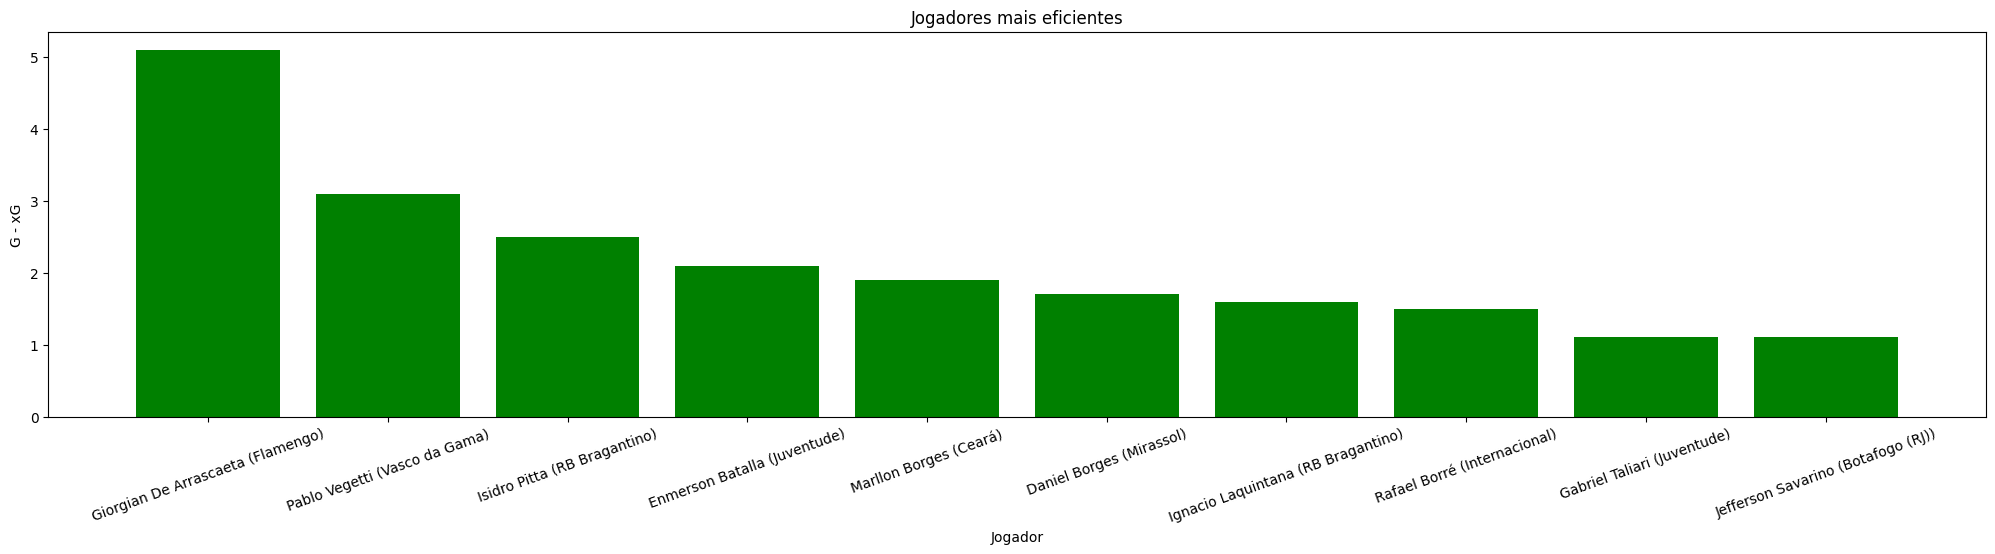

In [18]:
df_positivo['Jogador'] = df_positivo['Jogador'] + ' (' + df_positivo['Equipe'] + ')'

plt.figure(figsize=(25, 5))

cores = df_positivo['G-xG'].apply(lambda x: 'green' if x > 0 else 'red')

plt.bar(df_positivo['Jogador'], df_positivo['G-xG'], color=cores)

plt.xticks(rotation=20)
plt.xlabel('Jogador')
plt.ylabel('G - xG')
plt.title('Jogadores mais eficientes')
plt.show()


In [19]:
df_chutes = df_chutes.sort_values(by='G-xG', ascending=True)
df_negativo = df_chutes.head(10)

C:\Users\Pichau\AppData\Local\Temp\ipykernel_7272\3907730869.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_negativo['Jogador'] = df_negativo['Jogador'] + ' (' + df_negativo['Equipe'] + ')'


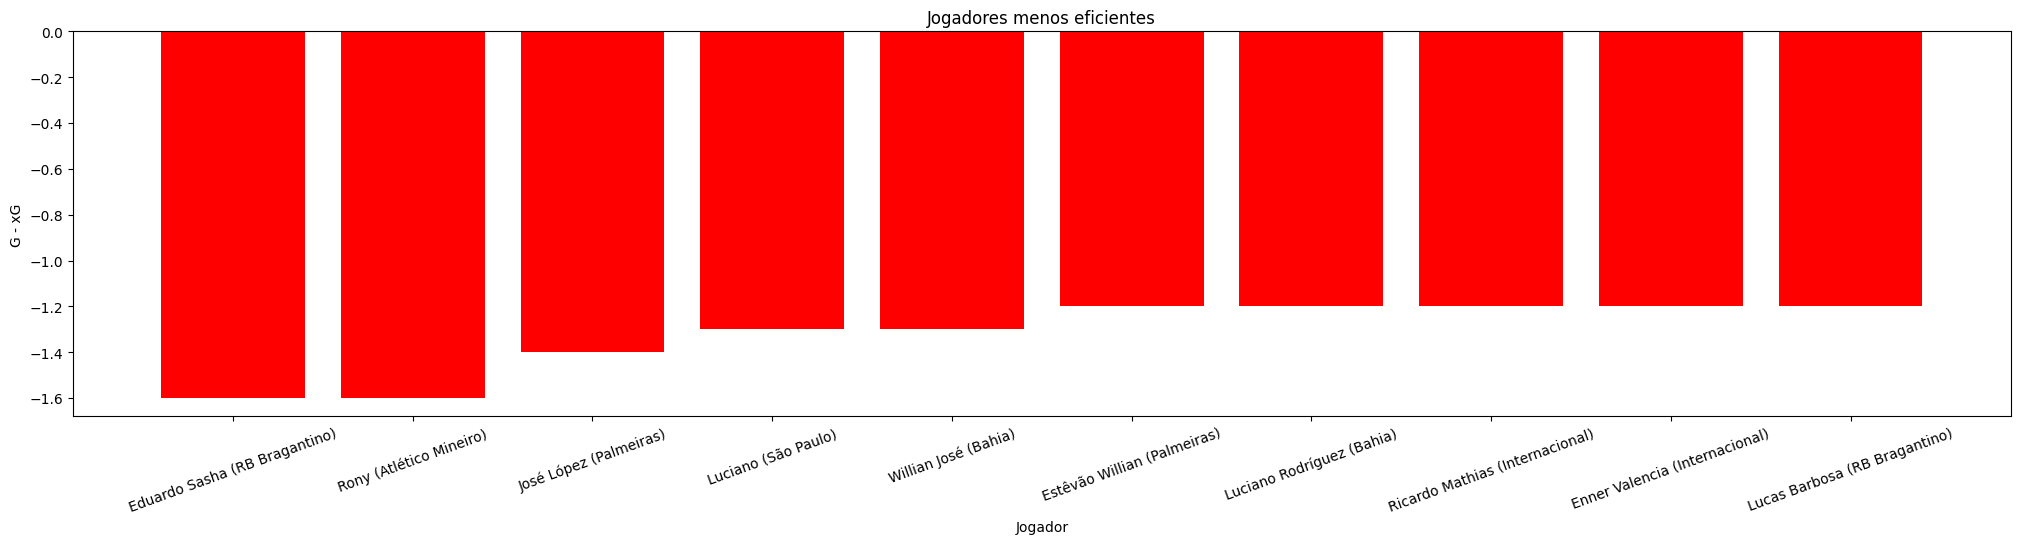

In [20]:
# Criar coluna com jogador + equipe
df_negativo['Jogador'] = df_negativo['Jogador'] + ' (' + df_negativo['Equipe'] + ')'

plt.figure(figsize=(25, 5))

cores = df_negativo['G-xG'].apply(lambda x: 'green' if x > 0 else 'red')

plt.bar(df_negativo['Jogador'], df_negativo['G-xG'], color=cores)

plt.xticks(rotation=20)
plt.xlabel('Jogador')
plt.ylabel('G - xG')
plt.title('Jogadores menos eficientes')
plt.show()


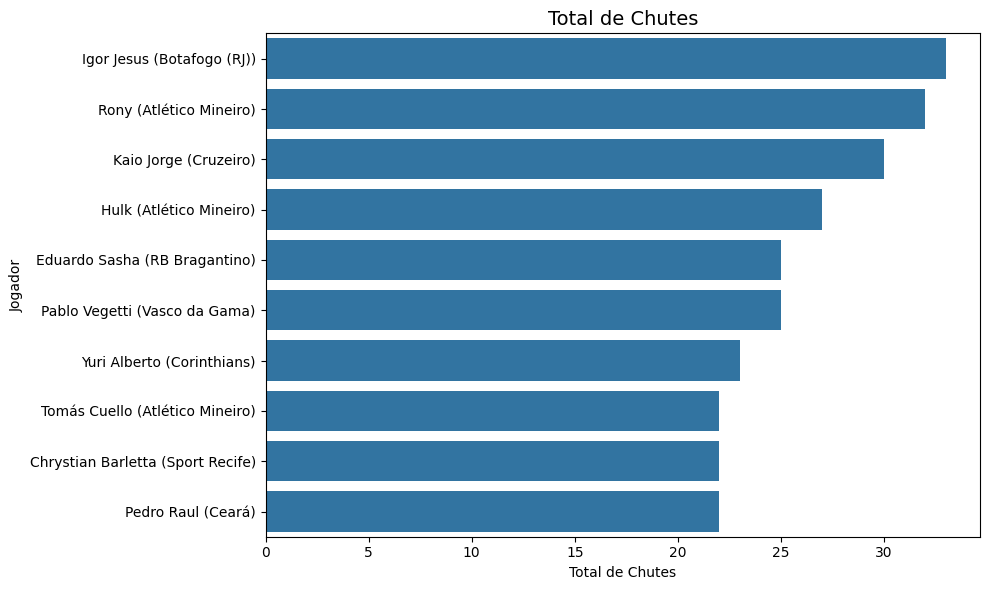

In [21]:
df_chutes = df_chutes.sort_values(by='TC', ascending=False)
df_chutes = df_chutes.head(10)

# Criar coluna com jogador + equipe
df_chutes['Jogador'] = df_chutes['Jogador'] + ' (' + df_chutes['Equipe'] + ')'
plt.figure(figsize=(10,6))

sns.barplot(
    x='TC', 
    y='Jogador',  
    data=df_chutes, 
)

plt.title('Total de Chutes', fontsize=14)
plt.xlabel('Total de Chutes')
plt.ylabel('Jogador')

plt.tight_layout()
plt.show()